<a href="https://colab.research.google.com/github/NabilRaiyan/OpenCV-Practice/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [170]:


# image_folder_path = '/content/drive/MyDrive/Animals'

# images = []
# labels = []
# class_names = sorted(os.listdir(image_folder_path))

# print("Class Names:", class_names)

# # Loop through each class folder
# for label, class_name in enumerate(class_names):
#     folder_path = os.path.join(image_folder_path, class_name)
#     print(f'\nProcessing folder: {folder_path}\n')

#     # Loop through each image in the class folder
#     for image_name in os.listdir(folder_path):
#         image_path = os.path.join(folder_path, image_name)

#         # Read the image
#         imageRead = cv2.imread(image_path)

#         if imageRead is None:
#             print(f"Skipping image: {image_name} as it could not be loaded.")
#             continue

#         try:
#             # Resize the image to 300x300
#             resized_image = cv2.resize(imageRead, (300, 300))

#             # Convert the resized image to grayscale
#             gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

#             # Display the grayscale image
#             plt.figure(figsize=(12, 4))
#             plt.imshow(gray_image, cmap="gray")
#             plt.title(f"Class: {class_name}")
#             plt.axis('off')
#             plt.show()

#             # Flatten the image (convert 2D image to 1D array)
#             flattened_image = gray_image.flatten()

#             # Append the flattened image and its label to the lists
#             images.append(flattened_image)
#             labels.append(label)

#         except Exception as e:
#             print(f"Error processing {image_name}: {e}")
#             continue

# # Convert the list of flattened images and labels to NumPy arrays
# images = np.array(images)
# labels = np.array(labels)

# print(f"Total images: {len(images)}")
# print(f"Shape of images: {images.shape}")


Class Names: ['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


Processing Tiger: 100%|██████████| 39/39 [00:00<00:00, 42.53image/s]


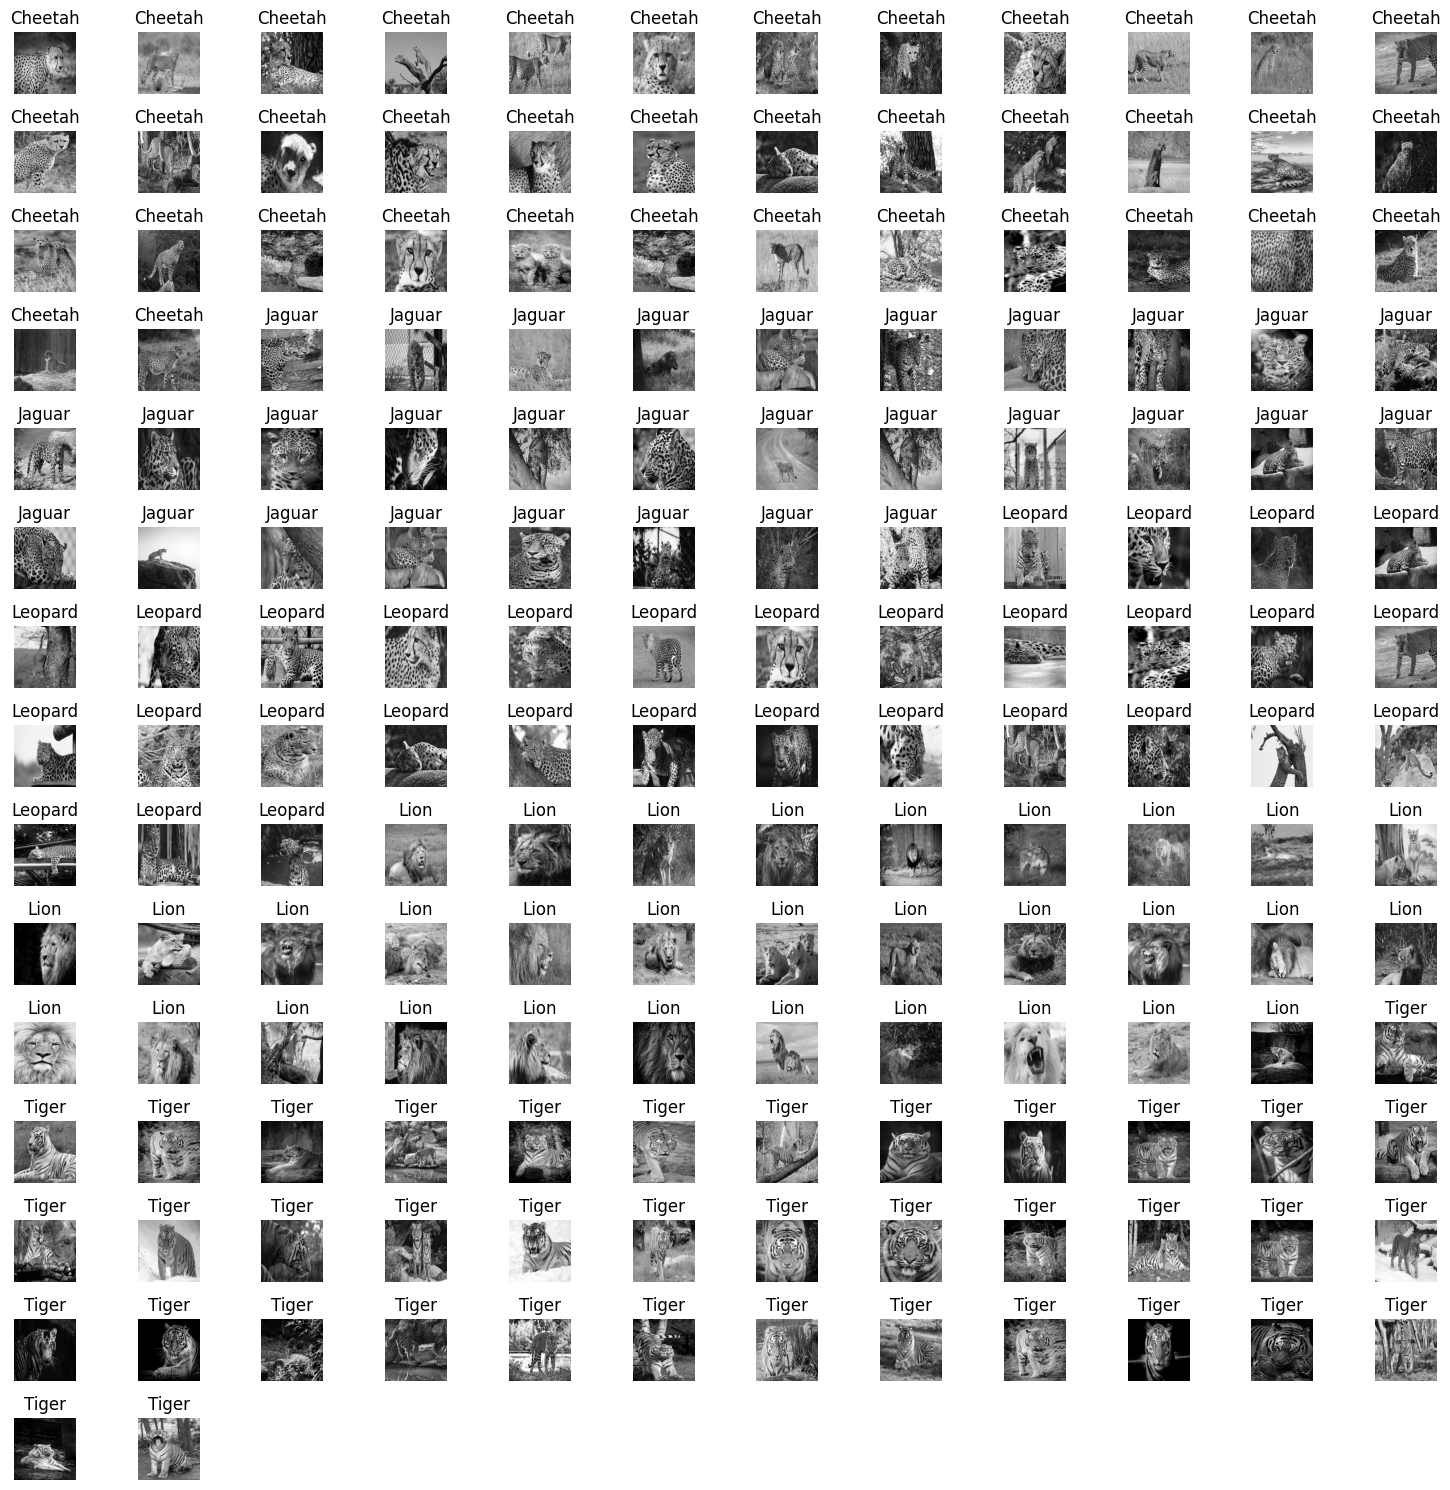

Total images: 170
Shape of images: (170, 90000)


In [171]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

image_folder_path = '/content/drive/MyDrive/Animals'

images = []
labels = []
class_names = sorted(os.listdir(image_folder_path))

print("Class Names:", class_names)

# Prepare a grid for displaying images
grid_size = 170  # Maximum number of images to display (adjustable)

# Dynamically calculate the number of rows and columns
rows = 15  # Number of rows
cols = (grid_size + rows - 1) // rows  # Calculate the number of columns to fit all images

plt.figure(figsize=(15, 15))  # Adjust the figure size

i = 0
for label, class_name in enumerate(class_names):
    folder_path = os.path.join(image_folder_path, class_name)

    image_files = os.listdir(folder_path)

     # Loop through each image in the class folder
    for image_name in tqdm(image_files, desc=f"Processing {class_name}", unit="image"):
        image_path = os.path.join(folder_path, image_name)

        # Read the image
        imageRead = cv2.imread(image_path)

        if imageRead is None:
            print(f"Skipping image: {image_name} as it could not be loaded.")
            continue

        try:
            # Resize the image to 300x300
            resized_image = cv2.resize(imageRead, (300, 300))

            # Convert the resized image to grayscale
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

            # If the number of images exceeds grid_size, break the loop
            if i >= grid_size:
                break

            # Plot the grayscale image in a subplot
            plt.subplot(rows, cols, i + 1)  # Create a grid with dynamic rows and columns
            plt.imshow(gray_image, cmap="gray")
            plt.title(f"{class_name}")
            plt.axis('off')  # Hide axis

            # Flatten the image (convert 2D image to 1D array)
            flattened_image = gray_image.flatten()

            # Append the flattened image and its label to the lists
            images.append(flattened_image)
            labels.append(label)

            i += 1

        except Exception as e:
            print(f"Error processing {image_name}: {e}")
            continue

# Convert the list of flattened images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Show the plot with the grid of images
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Print out the total number of images and their shape
print(f"Total images: {len(images)}")
print(f"Shape of images: {images.shape}")


In [172]:
# Convert the list of flattened images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Total images: {len(images)}")
print(f"Shape of images: {images.shape}")
print(f"Images array: {images}\n")
print(f"Labels array: {labels}\n")

Total images: 170
Shape of images: (170, 90000)
Images array: [[ 21  22  22 ...  59  56  56]
 [119 119 119 ... 106  89  91]
 [226 164 116 ...  83  54  76]
 ...
 [ 72  70  60 ... 128 183 155]
 [  0   0   0 ...  38  38  52]
 [112 104  95 ...  92  91  91]]

Labels array: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]



In [173]:
from collections import Counter

# Defining a function for calculating euclidean distance
def calculate_euclidean(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))


# knn function for training the model
def knn(train_data, train_labels, test_data, k):
  distances = []


  # Calculate the distance from the test image to all training images
  for i in range(len(train_data)):
    dist = calculate_euclidean(test_data, train_data[i])

    distances.append((dist, train_labels[i]))

    # Sort the distances and labels based on distance (ascending)
  distances.sort(key=lambda x: x[0])

  # Get the labels of the K closest neighbors
  k_nearest_labels = [label for _, label in distances[:k]]

  # Find the most common label among the K nearest neighbors
  most_common_label = Counter(k_nearest_labels).most_common(1)
  return most_common_label[0][0]



In [174]:
# function for 5 fold cross validation

import random

def cross_validation_knn(images,labels, k, num_folds = 5):


  # combine images and labels
  zip_images = list(zip(images, labels))
  random.shuffle(zip_images)
  images, labels = zip(*zip_images)


  # split the folds into 5
  fold_size = len(images) // num_folds

  accuracies = []

  for fold in range(num_folds):
    start_index = fold * fold_size
    end_index = (fold + 1 ) * fold_size if fold != num_folds - 1 else len(images)

    # defining the text fold
    X_test = images[start_index:end_index]
    y_test = labels[start_index:end_index]

    # Defining the train data folds
    X_train = np.concatenate((np.array(images[:start_index]).reshape(-1, images[0].shape[0]),
                              np.array(images[end_index:]).reshape(-1, images[0].shape[0])), axis=0)
    y_train = np.concatenate((np.array(labels[:start_index]), np.array(labels[end_index:])), axis=0)



    # predicting the label
    correct_predections = 0
    for i in range(len(X_test)):
      predicted_label = knn(X_train, y_train, X_test[i], k) # knn function called form above
      if predicted_label == y_test[i]:
        correct_predections += 1

    # Calculate the accuracy for this fold
    fold_accuracy = correct_predections / len(X_test)
    accuracies.append(fold_accuracy)
    print(f"Fold {fold + 1} accuracy: {fold_accuracy * 100:.2f}%")


  # Calculate the average accuracy across all folds
  average_accuracy = np.mean(accuracies)
  print(f"\nAverage accuracy across {num_folds} folds: {average_accuracy * 100:.2f}%")
  return accuracies, average_accuracy









Testing for K = 1
Fold 1 accuracy: 14.71%
Fold 2 accuracy: 29.41%
Fold 3 accuracy: 26.47%
Fold 4 accuracy: 38.24%
Fold 5 accuracy: 20.59%

Average accuracy across 5 folds: 25.88%

Testing for K = 2
Fold 1 accuracy: 26.47%
Fold 2 accuracy: 20.59%
Fold 3 accuracy: 23.53%
Fold 4 accuracy: 23.53%
Fold 5 accuracy: 23.53%

Average accuracy across 5 folds: 23.53%

Testing for K = 3
Fold 1 accuracy: 20.59%
Fold 2 accuracy: 20.59%
Fold 3 accuracy: 44.12%
Fold 4 accuracy: 29.41%
Fold 5 accuracy: 26.47%

Average accuracy across 5 folds: 28.24%

Testing for K = 4
Fold 1 accuracy: 20.59%
Fold 2 accuracy: 14.71%
Fold 3 accuracy: 23.53%
Fold 4 accuracy: 29.41%
Fold 5 accuracy: 23.53%

Average accuracy across 5 folds: 22.35%

Testing for K = 5
Fold 1 accuracy: 23.53%
Fold 2 accuracy: 32.35%
Fold 3 accuracy: 32.35%
Fold 4 accuracy: 35.29%
Fold 5 accuracy: 35.29%

Average accuracy across 5 folds: 31.76%

Testing for K = 6
Fold 1 accuracy: 8.82%
Fold 2 accuracy: 26.47%
Fold 3 accuracy: 32.35%
Fold 4 acc

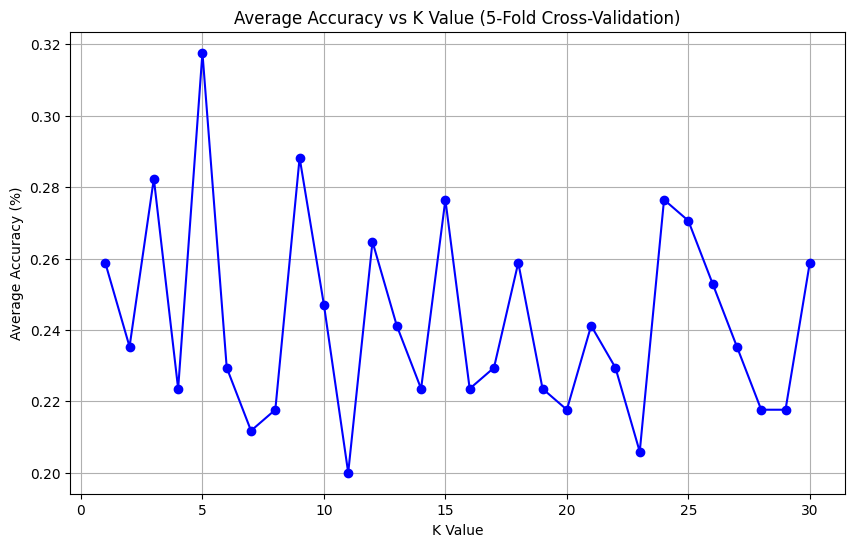


Best K value: 5 with average accuracy: 31.76%


In [175]:
import matplotlib.pyplot as plt

# Function to test different values of K
def test_different_k_values(images, labels, max_k=30, num_folds=5):
    k_values = list(range(1, max_k + 1))
    average_accuracies = []

    # Loop through different values of K
    for k in k_values:
        print(f"\nTesting for K = {k}")
        accuracies, avg_accuracy = cross_validation_knn(images, labels, k, num_folds)
        average_accuracies.append(avg_accuracy)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, average_accuracies, marker='o', color='b', linestyle='-')
    plt.xlabel('K Value')
    plt.ylabel('Average Accuracy (%)')
    plt.title('Average Accuracy vs K Value (5-Fold Cross-Validation)')
    plt.grid()
    plt.show()

    # Return the K value with the highest average accuracy
    best_k = k_values[np.argmax(average_accuracies)]
    best_accuracy = max(average_accuracies)
    print(f"\nBest K value: {best_k} with average accuracy: {best_accuracy * 100:.2f}%")
    return best_k, best_accuracy

# Call the function to test K values from 1 to 30
best_k, best_accuracy = test_different_k_values(images, labels)
